## Método del trapecio

Es un método de integración numérica para calcular aproximadamente el valor de la integral definida $$\int_{a}^b f(x)d(x).$$
Se basa en aproximar el valor de la integral de $f(x)$ por el de la función lineal que pasa a través de los puntos
$(a, f(a))$ y $(b, f(b))$. La integral de ésta es igual al área del trapecio bajo la gráfica de la función lineal. Se sigue que $$\int_{a}^b f(x)d(x) \approx (b-a) \frac {f(a)+f(b)}{2}.$$
Y el error es: $$- \frac {(b-a)^3}{12} f^{(2)}(\xi)$$
Siendo $ \xi$ un numero entre $a$ y $b$

### Método de los trapecios (Método del trapecio compuesto)
El método de los trapecios es una extensión de lo anterior, una forma de aproximar una integral definida utilizando $n$ trapecios. En la formulación de este método se supone que $f(x)$ es continua y positiva en el intervalo $[a,b]$.

Inicialmente tendriamos que el intervalo $[a,b]$ se divide en n subintervalos, cada uno de la misma longitud de ancho $\Delta x = \frac {(b - a)}{n}.$

Y finalmente queda dada por la siguiente fórmula:
$$\int_{a}^b f(x)d(x) \approx \frac {h}{2} [f(a) + 2 \sum_{k=1}^{n-1}f(x_k)+f(b)].$$
donde $h= \Delta x = \frac {(b - a)}{n}$ y $x_k= a+ kh$

Y el error estimado viene dado por $$E_x=-\frac{b-a}{12}h^2 f^{(2)}(\xi)$$

Donde $\xi$ es un punto en el intervalo, es decir, $\Delta x$

In [103]:
f(x)=x^(1/2) + 2
function Met_Trapecios(n::Int, lim_a, lim_b)
    #f(x)=x^(1/2) + 2
    aprox_trap=0
    h = (lim_b-lim_a)/n
    for k in 1:n-1
        aprox_trap += f(lim_a + k*h)
    end
    return h/2 * (f(lim_a) + 2*aprox_trap + f(lim_b))
end

Met_Trapecios (generic function with 1 method)

In [104]:
function Met_trap_Vect(n::Int, lim_a, lim_b)
    #f(x)=x^(1/2) + 2
    aprox_trap=0
    k=[1:n-1;]
    h = (lim_b-lim_a)/n
    aprox_trap = sum(f.(lim_a .+ k*h))
    return h/2 * (f(lim_a) + 2*aprox_trap + f(lim_b))
end

Met_trap_Vect (generic function with 1 method)

#### Ejemplo 
Usando una funcion definida como $f(x)=\sqrt{x}+2$ realizamos la aproximación en el intervalo (1:5) usando 10 subintervalos(trapecios)

In [105]:
num_intervalos=1000
lim_inferior=0
lim_superior=5

5

In [106]:
@btime Met_Trapecios($num_intervalos,$lim_inferior,$lim_superior)

  3.600 μs (0 allocations: 0 bytes)


17.45348689196708

In [107]:
@btime Met_trap_Vect($num_intervalos,$lim_inferior,$lim_superior)

  2.367 μs (3 allocations: 23.81 KiB)


17.453486891967085

Evaluando la integral de la función de forma directa el resultado sería $$\int_{1}^{10} (\sqrt{x}+2) d(x)=17.4535$$

Observamos el valor obtenido con la aproximación numérica y el valor real y podemos darnos cuenta de la variación que se genera.


In [39]:
function error_metodo(n,lim_a,lim_b)
    var_e=(lim_b-lim_a)/12
    h = (lim_b-lim_a)/n
    f2(x)=-1/(4*x^(3/2))
    return -var_e*(h^2)*f2(h)
end    

error_metodo (generic function with 1 method)

Calculamos el error:

In [91]:
error_metodo(num_intervalos,lim_inferior,lim_superior)

0.03294039229342062

Generamos una tabla con el error asociado al numero de trapecios utilizados.

In [93]:
datos_error=Float64[]
for i in 5:5:100
    push!(datos_error, error_metodo(i,lim_inferior,lim_superior))
end

In [94]:
println("# trapecios   error")
for index in 1:length(datos_error)
    println(index*5,"            ",datos_error[index] )
end

# trapecios   error
5            0.10416666666666667
10            0.0736569563735987
15            0.060140653040586016
20            0.052083333333333336
25            0.046584749531245626
30            0.04252586358998573
35            0.0393712992717945
40            0.03682847818679935
45            0.034722222222222224
50            0.03294039229342062
55            0.03140743172685038
60            0.030070326520293008
65            0.028890635220064024
70            0.02783971269921087
75            0.026895717681995952
80            0.026041666666666668
85            0.02526412760795135
90            0.024552318791199568
95            0.023897472278183517
100            0.023292374765622813


Graficamos la tabla anterior usando el paquete de CairoMakie

In [47]:
] add CairoMakie

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
   Installed CairoMakie ─ v0.8.13
    Updating `~/.julia/environments/v1.8/Project.toml`
⌃ [13f3f980] + CairoMakie v0.8.13
    Updating `~/.julia/environments/v1.8/Manifest.toml`
⌃ [13f3f980] + CairoMakie v0.8.13
        Info Packages marked with ⌃ have new versions available
Precompiling project...
  ✓ CairoMakie
  1 dependency successfully precompiled in 85 seconds. 256 already precompiled. 1 skipped during auto due to previous errors.


In [97]:
using CairoMakie

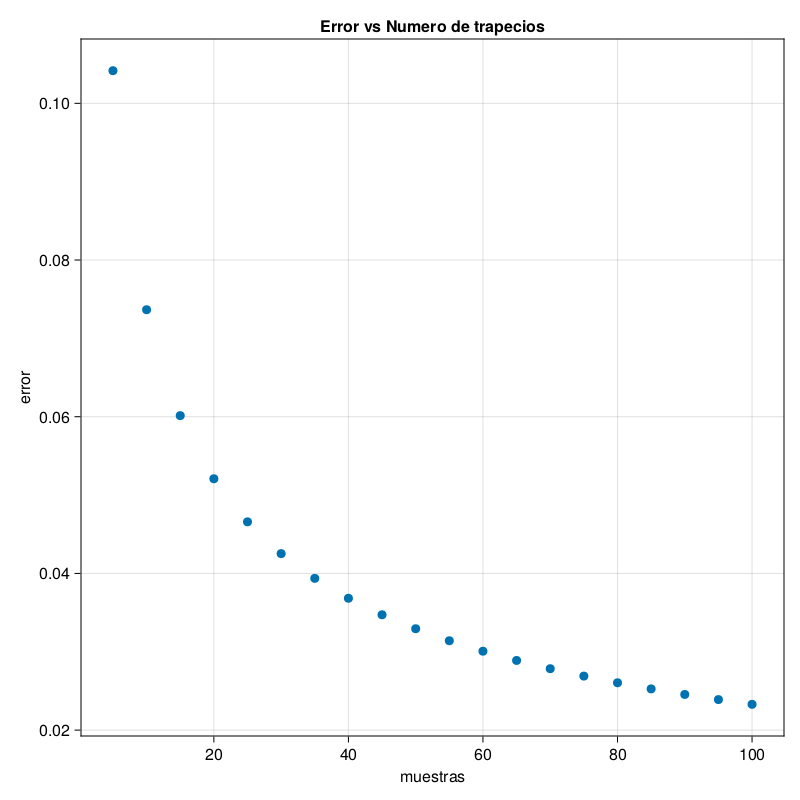

In [99]:
x = [5:5:100;]
scatter(x,datos_error;
    figure = (; resolution = (800, 800)),
    axis = (;title = "Error vs Numero de trapecios",xlabel="muestras", ylabel="error"))

Podemos comprobar en la tabla y por tanto en la gráfica que a medida que usamos mas muestras disminuye la perdida de exactitud respecto al valor real de la integral.

In [83]:
using BenchmarkTools

In [129]:
ntrapecios=[1:1000;]
@btime  for muestras in ntrapecios
    Met_Trapecios(muestras,$lim_inferior,$lim_superior)
end

  1.851 ms (1979 allocations: 46.55 KiB)


In [134]:
@btime Met_Trapecios.($ntrapecios,$lim_inferior,$lim_superior);
@btime Met_trap_Vect.($ntrapecios,$lim_inferior,$lim_superior);

  1.820 ms (1 allocation: 7.94 KiB)
  2.074 ms (3001 allocations: 11.85 MiB)


Comparamos con las herramientas de Benchmarking de julia y observamos que la vectorización de la función redujo el tiempo y la memoria utilizada para el calculo